# Binance EDA

Set up

In [3]:
apikey = 'uODOJ3RZVIV3OPMTE3NkQQaP1aBtyuAUDcs5sQ9BzGrC1IPitk4zZMSzqHlqKjhk'
secret = 'Ma1CL9xGnP15aSdeJgsWQYzELAGYX1CodehDfDCAtfgU6A9B3mghUSev6QjSkIOG'

In [4]:
!pip install python-binance pandas mplfinance

In [5]:
from binance import Client, ThreadedWebsocketManager , ThreadedDepthCacheManager
import pandas as pd

Authenticate

In [6]:
client = Client(apikey,secret)

Get Tickers

In [7]:
tickers = client.get_all_tickers()
tickers

[{'symbol': 'ETHBTC', 'price': '0.07305700'},
 {'symbol': 'LTCBTC', 'price': '0.00421100'},
 {'symbol': 'BNBBTC', 'price': '0.01461100'},
 {'symbol': 'NEOBTC', 'price': '0.00036500'},
 {'symbol': 'QTUMETH', 'price': '0.00156500'},
 {'symbol': 'EOSETH', 'price': '0.00068300'},
 {'symbol': 'SNTETH', 'price': '0.00001531'},
 {'symbol': 'BNTETH', 'price': '0.00026000'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00011200'},
 {'symbol': 'BNBETH', 'price': '0.20000000'},
 {'symbol': 'BTCUSDT', 'price': '20835.93000000'},
 {'symbol': 'ETHUSDT', 'price': '1522.49000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00001017'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [8]:
tickers_data = pd.DataFrame(tickers)

In [9]:
tickers_data.head()

,symbol,price
0,ETHBTC,0.07305700
1,LTCBTC,0.00421100
2,BNBBTC,0.01461100
3,NEOBTC,0.00036500
4,QTUMETH,0.00156500


In [10]:
tickers_data.tail()

,symbol,price
2134,MAGICBUSD,0.71390000
2135,MAGICUSDT,0.71410000
2136,BUSDRON,4.65600000
2137,HIFIETH,0.00033830
2138,HIFIUSDT,0.51680000


In [11]:
tickers_data.set_index('symbol', inplace = True)

In [12]:
tickers_data.loc['BTCUSDT']

price    20835.93000000
Name: BTCUSDT, dtype: object

Get Depth

In [13]:
depth = client.get_order_book(symbol = 'BTCUSDT')

In [14]:
depth

{'lastUpdateId': 30576085682,
 'bids': [['20835.47000000', '0.03772000'],
  ['20835.05000000', '0.00632000'],
  ['20834.66000000', '0.00100000'],
  ['20834.61000000', '0.00050000'],
  ['20834.59000000', '0.00100000'],
  ['20834.48000000', '0.00199000'],
  ['20834.47000000', '0.00100000'],
  ['20834.46000000', '0.01967000'],
  ['20834.45000000', '0.25163000'],
  ['20834.41000000', '0.00648000'],
  ['20834.39000000', '0.02400000'],
  ['20834.11000000', '0.00200000'],
  ['20834.04000000', '0.00686000'],
  ['20833.87000000', '0.00100000'],
  ['20833.85000000', '0.00597000'],
  ['20833.74000000', '0.95985000'],
  ['20833.71000000', '0.00400000'],
  ['20833.56000000', '0.01000000'],
  ['20833.45000000', '0.00100000'],
  ['20833.44000000', '0.04005000'],
  ['20833.43000000', '0.08700000'],
  ['20833.18000000', '0.00414000'],
  ['20833.16000000', '0.00100000'],
  ['20833.09000000', '0.00100000'],
  ['20833.07000000', '0.00120000'],
  ['20833.02000000', '0.09573000'],
  ['20833.01000000', '0.11

In [15]:
depth_data = pd.DataFrame(depth['bids'])
depth_data.columns = ['Price','Volume']
depth_data.head()

,Price,Volume
0,20835.47000000,0.03772000
1,20835.05000000,0.00632000
2,20834.66000000,0.00100000
3,20834.61000000,0.00050000
4,20834.59000000,0.00100000


Get Historical Data

In [16]:
#  [
#   [
#     1499040000000,      // Open time
#     "0.01634790",       // Open
#     "0.80000000",       // High
#     "0.01575800",       // Low
#     "0.01577100",       // Close
#     "148976.11427815",  // Volume
#     1499644799999,      // Close time
#     "2434.19055334",    // Quote asset volume
#     308,                // Number of trades
#     "1756.87402397",    // Taker buy base asset volume
#     "28.46694368",      // Taker buy quote asset volume
#     "17928899.62484339" // Ignore.
#   ]
# ]

In [17]:
historical = client.get_historical_klines('ETHBTC',Client.KLINE_INTERVAL_1DAY,'28 june 2020')

In [18]:
historical

[[1593302400000,
  '0.02451400',
  '0.02482200',
  '0.02440000',
  '0.02467000',
  '177716.31800000',
  1593388799999,
  '4373.11149278',
  69523,
  '83598.61800000',
  '2058.39629209',
  '0'],
 [1593388800000,
  '0.02466800',
  '0.02489900',
  '0.02441500',
  '0.02480400',
  '230606.50400000',
  1593475199999,
  '5684.35786094',
  87849,
  '113092.22200000',
  '2787.49388508',
  '0'],
 [1593475200000,
  '0.02480100',
  '0.02488300',
  '0.02453700',
  '0.02468500',
  '172328.45500000',
  1593561599999,
  '4260.40717585',
  64905,
  '84380.14400000',
  '2085.72419572',
  '0'],
 [1593561600000,
  '0.02468500',
  '0.02508600',
  '0.02458000',
  '0.02502000',
  '203342.86500000',
  1593647999999,
  '5051.02684318',
  82356,
  '101764.63500000',
  '2527.89268569',
  '0'],
 [1593648000000,
  '0.02502100',
  '0.02506600',
  '0.02474500',
  '0.02492500',
  '222122.81400000',
  1593734399999,
  '5532.58026158',
  92522,
  '115066.76600000',
  '2866.75501972',
  '0'],
 [1593734400000,
  '0.02492

In [19]:
hist_data = pd.DataFrame(historical)

In [20]:
hist_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1593302400000,0.02451400,0.02482200,0.02440000,0.02467000,177716.31800000,1593388799999,4373.11149278,69523,83598.61800000,2058.39629209,0
1,1593388800000,0.02466800,0.02489900,0.02441500,0.02480400,230606.50400000,1593475199999,5684.35786094,87849,113092.22200000,2787.49388508,0
2,1593475200000,0.02480100,0.02488300,0.02453700,0.02468500,172328.45500000,1593561599999,4260.40717585,64905,84380.14400000,2085.72419572,0
3,1593561600000,0.02468500,0.02508600,0.02458000,0.02502000,203342.86500000,1593647999999,5051.02684318,82356,101764.63500000,2527.89268569,0
4,1593648000000,0.02502100,0.02506600,0.02474500,0.02492500,222122.81400000,1593734399999,5532.58026158,92522,115066.76600000,2866.75501972,0


In [21]:
hist_data.columns = ['Open Time','Open','High','Low','Close','Volume','Close Time','Quote Asset Volume','Number of Traders','TB Base Volume','TB Quote Volume','Ignore']

In [22]:
hist_data.tail()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Traders,TB Base Volume,TB Quote Volume,Ignore
926,1673308800000,0.07685700,0.07728500,0.07655300,0.07656800,56694.32760000,1673395199999,4362.98550058,98741,27896.00800000,2146.88898261,0
927,1673395200000,0.07656900,0.07792000,0.07621600,0.07743100,64036.96650000,1673481599999,4912.59605442,113986,32485.34920000,2493.02151375,0
928,1673481600000,0.07743100,0.07788800,0.07503300,0.07512400,115119.41120000,1673567999999,8800.02216060,230722,56051.77260000,4285.99459356,0
929,1673568000000,0.07512300,0.07512400,0.07276100,0.07276100,111814.66660000,1673654399999,8279.63253495,205797,47407.38880000,3511.70415899,0
930,1673654400000,0.07281100,0.07522600,0.07201600,0.07305700,145957.12790000,1673740799999,10763.90681602,296343,86190.76640000,6350.95518037,0


In [23]:
hist_data.shape

(931, 12)

In [24]:
hist_data.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Traders      int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

Preprocessing Historical Data

In [25]:
hist_data['Open Time']= pd.to_datetime(hist_data['Open Time']/1000,unit = 's')
hist_data['Close Time']= pd.to_datetime(hist_data['Close Time']/1000,unit = 's')

In [26]:
numeric_columns = ['Open','High','Low','Close','Volume','Quote Asset Volume','TB Base Volume','TB Quote Volume']

In [29]:
hist_data[numeric_columns] = hist_data[numeric_columns].apply(pd.to_numeric, axis = 1)

In [31]:
hist_data.dtypes

Open Time             datetime64[ns]
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Traders              int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [32]:
hist_data.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Traders,TB Base Volume,TB Quote Volume
count,931.000000,931.000000,931.000000,931.000000,9.310000e+02,931.000000,9.310000e+02,931.000000,931.000000
mean,0.057702,0.058799,0.056595,0.057754,1.943595e+05,9262.570706,2.332455e+05,96383.510745,4591.328494
std,0.018632,0.018834,0.018404,0.018607,1.589567e+05,5930.918174,1.383708e+05,79077.037245,2946.578143
min,0.024055,0.024822,0.022754,0.024055,1.631953e+04,1209.022225,3.566600e+04,7663.309900,567.813601
25%,0.035262,0.036082,0.034584,0.035328,8.343655e+04,5456.664002,1.425240e+05,41385.168400,2677.844170
50%,0.066610,0.067680,0.065320,0.066640,1.372624e+05,7708.909085,1.996610e+05,66754.151000,3800.977835
75%,0.072736,0.073727,0.071683,0.072762,2.628787e+05,10972.870154,2.876170e+05,131983.684000,5541.215674
max,0.087911,0.088366,0.085968,0.087910,1.076656e+06,56836.342035,1.201493e+06,546475.336000,28345.303271


In [33]:
hist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Open Time           931 non-null    datetime64[ns]
 1   Open                931 non-null    float64       
 2   High                931 non-null    float64       
 3   Low                 931 non-null    float64       
 4   Close               931 non-null    float64       
 5   Volume              931 non-null    float64       
 6   Close Time          931 non-null    datetime64[ns]
 7   Quote Asset Volume  931 non-null    float64       
 8   Number of Traders   931 non-null    int64         
 9   TB Base Volume      931 non-null    float64       
 10  TB Quote Volume     931 non-null    float64       
 11  Ignore              931 non-null    object        
dtypes: datetime64[ns](2), float64(8), int64(1), object(1)
memory usage: 87.4+ KB


Visualization

In [34]:
import mplfinance as mpf

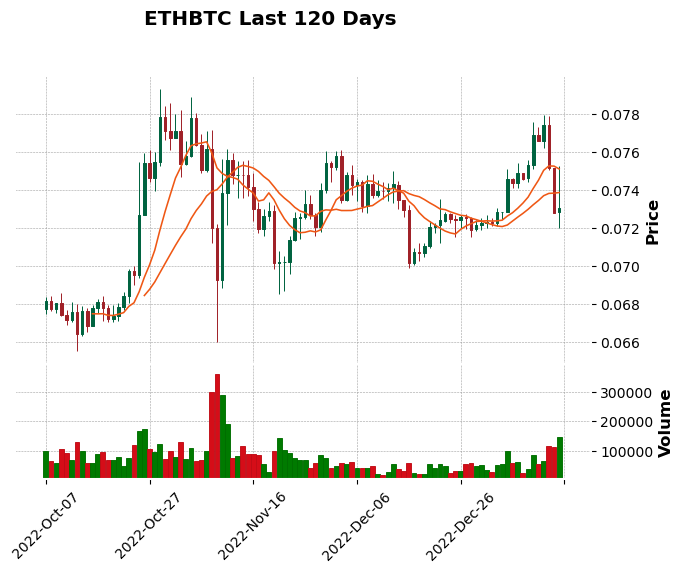

In [44]:
mpf.plot(hist_data.set_index('Close Time').tail(100),type  = 'candle',style = 'charles',volume=True,title = 'ETHBTC Last 120 Days',mav = (10,20))

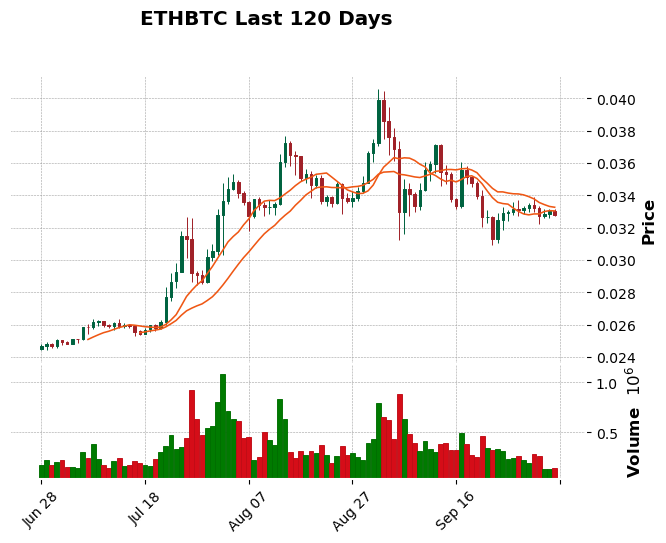

In [46]:
mpf.plot(hist_data.set_index('Open Time').head(100),type  = 'candle',style = 'charles',volume=True,title = 'ETHBTC Last 120 Days',mav = (10,20))